# Matplotlib grid of axes

### Importance
Have you ever wished to be able to plot multiple graphs on a grid of axes arranged across a figure?! 

Or, maybe, plotting graphs a grid of axes that can span rows or columns?!

If so, you are in the right place, since we are going to discuss how to arrange a grid of axes using the Matplotlib library in Python.

### Scope of tutorial and what you learn

In this tutorial, we create a pandas DataFrame from a COVID-19 dataset.
We will then group the DataFrame based on the weekly and monthly time intervals to create the corresponding statistical reports for COVID-19.
Then, we introduce the ***GridSpec*** and ***SubplotSpec*** classes, and the underlying mechanics of their operation when working with the Matplotlib grid of axes.
We will finally create a ***GridSpec*** object and produce data visualization for the COVID-19 dataset using multiple datasets arranged across the grid of axed provided by the ***GridSpec*** object.

As you flow through this tutorial, you learn the answer to questions such as:

\- What is _GridSpec_ in Matplotlib Python?<br>
\- What is _SubplotSpec_ in Matplotlib Python?<br>
\- Which one(s) of _GridSpec_ and _SubplotSpec_ do we need to create manually?!<br>
\- How to create plots that span rows or columns using Matplotlib Python?!<br>

With that being said, here is the outline of this tutorial:

### Outline

\- [Introduction](#introduction)<br>
\- [Loading and pre-processing the COVID-19 dataset](#preprocess)<br>
\- [Matplotlib axes grid](#matplotlib-grid)<br>
&emsp;\- [Matplotlib grid of axes: under the hood](#matplotlib-grid-under-hood)<br>
&emsp;\- [Data visualization of COVID-19 dataset](#covid19-data-visualization)<br>
\- [Recap](#recap)<br>
\- [Quiz](#quiz)<br>

<a id='introduction'></a>
## Hands-on tutorial for data science learners: COVID-19 dataset | Matplotlib grid

**<font color="red">Disclaimer:</font>**

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial for data science learners. Although you may find some useful statistical information about the COVID-19, please note that studying the COVID-19 is not the primary objective here. Hence, you may discern that a large portion of this set of tutorials is devoted to teaching how to use Python and useful packages like _pandas_, _matplotlib_, _seaborn_, etc., in order to accomplish several important tasks in the context of data science. For example, these tutorials will hopefully help you with exploratory data analysis (EDA), data cleansing, statistical analysis, and data visualization of a generic dataset. Yet, some interesting findings will be revealed thanks to the comprehensive dataset provided by _Our World in Data_.

### COVID-19 dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

<a id='preprocess'></a>
## Loading and pre-processing the COVID-19 dataset

### Loading the Python libraries
First, let's load the required libraries:

In [1]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import dates as mdates
from matplotlib.ticker import FormatStrFormatter

### Loading the COVID-19 dataset
You can either read the dataset from the _csv_ file downloadable from our website, [as seen in the previous tutorials](https://soardeepsci.com/a-practical-tutorial-on-data-science-part-1-python-pandas-dataframe/).

Alternatively, you can read the most-updated COVID-19 dataset into a pandas DataFrame directly from its remote repository, as shown below:

In [2]:
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Converting the data type of date from object to datetime

As seen in previous tutorials, in order to convert the variable _date_ from an object to a datetime, we can use the pandas function "to_datetime":

In [3]:
#convert date from object to a datetime
df_from_url.date = pd.to_datetime(df_from_url.date)

Now, let's make a copy of this DataFrame to be used in the rest of this tutorial:

In [4]:
df = df_from_url.copy()

### Weekly and monthly grouping pandas Groupby & Grouper

When preparing weekly or monthly statistical reports, we need to pay attention to the nature of each variable that we are interested in.

For example, for variables such as **total cases**, **total deaths**, etc., we need to average the corresponding daily statistics over a time interval by applying the function _mean_ when grouping the DataFrame.
For such variables, we obtain the average of corresponding values over the applied time interval, _e.g._ weekly-average total cases, weekly-average total deaths, etc.

In contrast, for variables such as **new cases**, **new deaths**, **new tests**, **new vaccination**, etc., we need to sum the corresponding daily statistics over a time interval by applying the function _sum_ when grouping the DataFrame. 
For such variables, we obtain the total corresponding values over the applied time interval, _e.g._ total new cases per week, total deaths per week, etc.
Please, feel free to see [Part 5 of this tutorial set, on Groupby and Grouper](https://soardeepsci.com/a-hands-on-tutorial-for-data-science-learners-covid-19-dataset-part-5-groupby-grouper/) for more information.

As a result, there are two approaches to follow:

1\. To specify the list of variables that need to be averaged weekly or monthly, and another list for those that need to be summed over weeks or months. The variables will, then, be grouped differently taking into account their nature.

2\. To create two whole DataFrame: one by applying the function _sum_ when grouping the DataFrame, and the other one by applying the function _mean_. 
Later, when we want to use the grouped variables, we will choose the variable from the proper grouped DataFrame.

Here, we adopt the latter option. 
So, let's group our DataFrame by week and month, once by applying the _sum_ function, and another time with the _mean_ function (4 new DataFrames in total):

In [5]:
df_m_sum = df.groupby(['location',pd.Grouper(key='date', axis=0, freq='M', label='right', closed='right')]).sum()
df_w_sum = df.groupby(['location',pd.Grouper(key='date', axis=0, freq='W', label='right', closed='right')]).sum()

df_m_mean = df.groupby(['location',pd.Grouper(key='date', axis=0, freq='M', label='right', closed='right')]).mean()
df_w_mean = df.groupby(['location',pd.Grouper(key='date', axis=0, freq='W', label='right', closed='right')]).mean()

Here is the grouped DataFrame summed over monthly time-intervals with new indices of _location_ and _date_:

In [6]:
df_m_sum

total_cases  new_cases  new_cases_smoothed  \
location    date                                                     
Afghanistan 2020-02-29         30.0        5.0               0.714   
            2020-03-31       1141.0      161.0             102.143   
            2020-04-30      25152.0     1661.0            1451.713   
            2020-05-31     222720.0    13353.0           11601.569   
            2020-06-30     751685.0    16265.0           17534.144   
...                             ...        ...                 ...   
Zimbabwe    2021-08-31    3706768.0    15913.0           20709.857   
            2021-09-30    3823536.0     6047.0            5666.999   
            2021-10-31    4096547.0     2157.0            2881.285   
            2021-11-30    4005243.0     1648.0            1152.285   
            2021-12-31    5268184.0    77103.0           72158.717   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-02-29           0.0         0.0                0.000   
            2020-03-31          21.0         4.0                2.716   
            2020-04-30         812.0        56.0               49.002   
            2020-05-31        4924.0       194.0              187.141   
            2020-06-30       14982.0       485.0              464.287   
...                              ...         ...                  ...   
Zimbabwe    2021-08-31      126703.0       887.0             1051.999   
            2021-09-30      136426.0       204.0              224.857   
            2021-10-31      144217.0        55.0               65.286   
            2021-11-30      140862.0        29.0               29.715   
            2021-12-31      143664.0       290.0              214.141   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-02-29                    0.756                  0.126   
            2020-03-31                   28.646                  4.042   
            2020-04-30                  631.400                 41.699   
            2020-05-31                 5591.003                335.205   
            2020-06-30                18869.759                408.304   
...                                         ...                    ...   
Zimbabwe    2021-08-31               245608.667               1054.389   
            2021-09-30               253345.660                400.670   
            2021-10-31               271435.238                142.922   
            2021-11-30               265385.476                109.196   
            2021-12-31               349067.341               5108.810   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-02-29                           0.018   
            2020-03-31                           2.568   
            2020-04-30                          36.444   
            2020-05-31                         291.238   
            2020-06-30                         440.165   
...                                                ...   
Zimbabwe    2021-08-31                        1372.225   
            2021-09-30                         375.490   
            2021-10-31                         190.912   
            2021-11-30                          76.350   
            2021-12-31                        4781.201   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-02-29                     0.000  ...             0.0   
            2020-03-31                     0.525  ...             0.0   
            2020-04-30                    20.384  ...             0.0   
            2020-05-31                   123.606  ...             0.0   
       

And, the grouped DataFrame summed over weekly time-intervals with new indices of _location_ and _date_:

In [7]:
df_w_sum

total_cases  new_cases  new_cases_smoothed  \
location    date                                                     
Afghanistan 2020-03-01         35.0        5.0               1.428   
            2020-03-08         41.0        3.0               0.858   
            2020-03-15         83.0       12.0               6.000   
            2020-03-22        185.0       14.0              14.572   
            2020-03-29        547.0       80.0              51.714   
...                             ...        ...                 ...   
Zimbabwe    2021-12-05     955577.0     5095.0            2726.428   
            2021-12-12    1075051.0    28094.0           17067.714   
            2021-12-19    1269706.0    24533.0           27807.858   
            2021-12-26    1404428.0    12678.0           19246.001   
            2022-01-02     832273.0     7377.0            5525.430   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-03-01           0.0         0.0                0.000   
            2020-03-08           0.0         0.0                0.000   
            2020-03-15           0.0         0.0                0.000   
            2020-03-22           0.0         0.0                0.000   
            2020-03-29          13.0         4.0                1.858   
...                              ...         ...                  ...   
Zimbabwe    2021-12-05       32954.0         5.0                5.142   
            2021-12-12       33062.0        28.0               15.428   
            2021-12-19       33322.0        44.0               37.143   
            2021-12-26       33954.0       109.0               90.285   
            2022-01-02       19785.0       106.0               68.286   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-03-01                    0.882                  0.126   
            2020-03-08                    1.032                  0.075   
            2020-03-15                    2.083                  0.301   
            2020-03-22                    4.645                  0.352   
            2020-03-29                   13.731                  2.009   
...                                         ...                    ...   
Zimbabwe    2021-12-05                63316.073                337.593   
            2021-12-12                71232.363               1861.496   
            2021-12-19                84130.108               1625.545   
            2021-12-26                93056.725                840.038   
            2022-01-02                55146.010                488.797   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-03-01                           0.036   
            2020-03-08                           0.022   
            2020-03-15                           0.153   
            2020-03-22                           0.367   
            2020-03-29                           1.298   
...                                                ...   
Zimbabwe    2021-12-05                         180.651   
            2021-12-12                        1130.898   
            2021-12-19                        1842.537   
            2021-12-26                        1275.230   
            2022-01-02                         366.112   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-03-01                     0.000  ...             0.0   
            2020-03-08                     0.000  ...             0.0   
            2020-03-15                     0.000  ...             0.0   
            2020-03-22                     0.000  ...             0.0   
       

Similarly, here is the grouped DataFrame averaged over monthly time-intervals with new indices of _location_ and _date_:

In [8]:
df_m_mean

total_cases    new_cases  new_cases_smoothed  \
location    date                                                         
Afghanistan 2020-02-29       5.000000     0.833333            0.714000   
            2020-03-31      36.806452     5.193548            3.294935   
            2020-04-30     838.400000    55.366667           48.390433   
            2020-05-31    7184.516129   430.741935          374.244161   
            2020-06-30   25056.166667   542.166667          584.471467   
...                               ...          ...                 ...   
Zimbabwe    2021-08-31  119573.161290   513.322581          668.059903   
            2021-09-30  127451.200000   201.566667          188.899967   
            2021-10-31  132146.677419    69.580645           92.944677   
            2021-11-30  133508.100000    54.933333           38.409500   
            2021-12-31  175606.133333  2570.100000         2405.290567   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-02-29           NaN         NaN                  NaN   
            2020-03-31      2.333333    0.444444             0.301778   
            2020-04-30     27.066667    1.866667             1.633400   
            2020-05-31    158.838710    6.258065             6.036806   
            2020-06-30    499.400000   16.166667            15.476233   
...                              ...         ...                  ...   
Zimbabwe    2021-08-31   4087.193548   28.612903            33.935452   
            2021-09-30   4547.533333    6.800000             7.495233   
            2021-10-31   4652.161290    1.774194             2.106000   
            2021-11-30   4695.400000    0.966667             0.990500   
            2021-12-31   4788.800000    9.666667             7.138033   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-02-29                 0.126000               0.021000   
            2020-03-31                 0.924065               0.130387   
            2020-04-30                21.046667               1.389967   
            2020-05-31               180.354935              10.813065   
            2020-06-30               628.991967              13.610133   
...                                         ...                    ...   
Zimbabwe    2021-08-31              7922.860226              34.012548   
            2021-09-30              8444.855333              13.355667   
            2021-10-31              8755.975419               4.610387   
            2021-11-30              8846.182533               3.639867   
            2021-12-31             11635.578033             170.293667   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-02-29                        0.018000   
            2020-03-31                        0.082839   
            2020-04-30                        1.214800   
            2020-05-31                        9.394774   
            2020-06-30                       14.672167   
...                                                ...   
Zimbabwe    2021-08-31                       44.265323   
            2021-09-30                       12.516333   
            2021-10-31                        6.158452   
            2021-11-30                        2.545000   
            2021-12-31                      159.373367   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-02-29                       NaN  ...             NaN   
            2020-03-31                  0.058333  ...             NaN   
            2020-04-30                  0.679467  ...             NaN   
            2020-05-31        

And, the grouped DataFrame averaged over weekly time-intervals with new indices of _location_ and _date_:

In [9]:
df_w_mean

total_cases    new_cases  new_cases_smoothed  \
location    date                                                         
Afghanistan 2020-03-01       5.000000     0.714286            0.714000   
            2020-03-08       5.857143     0.428571            0.122571   
            2020-03-15      11.857143     1.714286            0.857143   
            2020-03-22      26.428571     2.000000            2.081714   
            2020-03-29      78.142857    11.428571            7.387714   
...                               ...          ...                 ...   
Zimbabwe    2021-12-05  136511.000000   727.857143          389.489714   
            2021-12-12  153578.714286  4013.428571         2438.244857   
            2021-12-19  181386.571429  3504.714286         3972.551143   
            2021-12-26  200632.571429  1811.142857         2749.428714   
            2022-01-02  208068.250000  1844.250000         1381.357500   

                        total_deaths  new_deaths  new_deaths_smoothed  \
location    date                                                        
Afghanistan 2020-03-01           NaN         NaN                  NaN   
            2020-03-08           NaN         NaN                  NaN   
            2020-03-15           NaN         NaN                  NaN   
            2020-03-22           NaN         NaN                  NaN   
            2020-03-29      1.857143    0.571429             0.265429   
...                              ...         ...                  ...   
Zimbabwe    2021-12-05   4707.714286    0.714286             0.734571   
            2021-12-12   4723.142857    4.000000             2.204000   
            2021-12-19   4760.285714    6.285714             5.306143   
            2021-12-26   4850.571429   15.571429            12.897857   
            2022-01-02   4946.250000   26.500000            17.071500   

                        total_cases_per_million  new_cases_per_million  \
location    date                                                         
Afghanistan 2020-03-01                 0.126000               0.018000   
            2020-03-08                 0.147429               0.010714   
            2020-03-15                 0.297571               0.043000   
            2020-03-22                 0.663571               0.050286   
            2020-03-29                 1.961571               0.287000   
...                                         ...                    ...   
Zimbabwe    2021-12-05              9045.153286              48.227571   
            2021-12-12             10176.051857             265.928000   
            2021-12-19             12018.586857             232.220714   
            2021-12-26             13293.817857             120.005429   
            2022-01-02             13786.502500             122.199250   

                        new_cases_smoothed_per_million  \
location    date                                         
Afghanistan 2020-03-01                        0.018000   
            2020-03-08                        0.003143   
            2020-03-15                        0.021857   
            2020-03-22                        0.052429   
            2020-03-29                        0.185429   
...                                                ...   
Zimbabwe    2021-12-05                       25.807286   
            2021-12-12                      161.556857   
            2021-12-19                      263.219571   
            2021-12-26                      182.175714   
            2022-01-02                       91.528000   

                        total_deaths_per_million  ...  female_smokers  \
location    date                                  ...                   
Afghanistan 2020-03-01                       NaN  ...             NaN   
            2020-03-08                       NaN  ...             NaN   
            2020-03-15                       NaN  ...             NaN   
            2020-03-22        

### Examining the COVID-19 statistics across the world

Let's create DataFrames for the weekly and monthly statistics of COVID-19 across the world, _i.e._ _location_ of "world":

In [10]:
df_world_m_sum = df_m_sum.loc['World']
df_world_m_mean = df_m_mean.loc['World']

df_world_w_sum = df_w_sum.loc['World']
df_world_w_mean = df_w_mean.loc['World']

Here is how the monthly-grouped DataFrame with the _sum_ function looks like:

In [11]:
df_world_m_sum

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,3.853900e+04,9370.0,3.885286e+03,889.0,196.0,81.428,4.894,1.191,0.494,0.112,...,64.340,346.350,601.30,27.050,725.80,7.370,0.0,0.0,0.0,0.0
2020-02-29,1.672070e+06,76095.0,7.668871e+04,46911.0,2730.0,2626.142,212.328,9.662,9.737,5.957,...,186.586,1004.415,1743.77,78.445,2104.82,21.373,0.0,0.0,0.0,0.0
2020-03-31,9.064469e+06,790076.0,5.918419e+05,400548.0,41727.0,29893.717,1151.046,100.323,75.155,50.862,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-04-30,6.360774e+07,2404792.0,2.375041e+06,4400372.0,196326.0,190132.285,8077.209,305.372,301.596,558.781,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-05-31,1.452696e+08,2908017.0,2.790779e+06,9986371.0,150010.0,155160.858,18447.020,369.274,354.387,1268.116,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-06-30,2.468213e+08,4278978.0,4.112793e+06,13975793.0,145193.0,144667.999,31342.522,543.363,522.263,1774.712,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0
2020-07-31,4.320444e+08,7142929.0,6.842186e+06,19312623.0,176043.0,170266.714,54863.014,907.040,868.855,2452.408,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-08-31,6.719327e+08,7902606.0,7.942911e+06,25081989.0,183416.0,187410.286,85325.165,1003.508,1008.627,3185.027,...,199.454,1073.685,1864.03,83.855,2249.98,22.847,0.0,0.0,0.0,0.0
2020-09-30,8.950148e+08,8504573.0,8.414902e+06,29550877.0,164842.0,163943.287,113653.164,1079.949,1068.564,3752.507,...,193.020,1039.050,1803.90,81.150,2177.40,22.110,0.0,0.0,0.0,0.0


Similarly, here is how the weekly-grouped DataFrame with the _mean_ function looks like:

In [12]:
df_world_w_mean

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,1.141000e+03,3.122000e+02,NaN,3.180000e+01,7.800000,NaN,0.144800,0.039600,NaN,0.003800,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-02-02,8.808429e+03,2.095571e+03,1.249286e+03,1.930000e+02,43.714286,26.023667,1.118714,0.266286,0.158667,0.024571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-02-09,3.056043e+04,3.339143e+03,3.107429e+03,6.495714e+02,77.714286,65.224429,3.880714,0.424143,0.394571,0.082429,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-02-16,5.719800e+04,4.439143e+03,3.805367e+03,1.367714e+03,123.428571,102.591857,7.263143,0.563571,0.483286,0.173714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2020-02-23,7.638729e+04,1.106714e+03,2.741327e+03,2.204000e+03,100.000000,119.469429,9.700143,0.140429,0.348000,0.279857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,2.641485e+08,6.225086e+05,5.945479e+05,5.234415e+06,8008.428571,7444.489857,33542.815857,79.048857,75.498429,664.690286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2021-12-12,2.684725e+08,6.163116e+05,6.177157e+05,5.287875e+06,7176.571429,7637.081571,34091.898714,78.262143,78.440429,671.479143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2021-12-19,2.728924e+08,6.500509e+05,6.314069e+05,5.336507e+06,6765.714286,6947.387571,34653.151571,82.546429,80.179000,677.654714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


<a id='matplotlib-grid'></a>
## Matplotlib axes grid

It happens quite often that we want to plot multiple graphs on the same figure, so that the axes of different graphs are arranged into a regular grid inside the figure. 

The Matplotlib library in Python provides numerous powerful tools such as _subfigure_, _subplots_, <i>subplot_mosaic</i>, etc.,  for working with grids of Axes. 
In the following, we provide some examples to demonstrate how to work with the Matplotlib grid of axes.


<a id='matplotlib-grid-under-hood'></a>
### Matplotlib grid of axes: under the hood

In this section, I would like to discuss some of the low-level methods to arrange the _Axes_ objects by using the ***GridSpec*** objects.
The Matplotlib library in Python provides with tons of low-level cool features that offering a high level of flexibilities to produce high quality data visualizations.

You may wonder, _what is GridSpec object though?!_

It turns out that the Matplotlib library manages the arrangement of a grid of _Axes_ using two classes of ***GridSpec*** and ***SubplotSpec***.
The ***GridSpec*** defines a grid layout to place subplots within a figure, 
while ***SubplotSpec*** describes the location of a subplot in an instance object of ***GridSpec***.

You typically create a ***GridSpec*** instance object using the <b>add_gridspec</b> method from a **Figure** object.
The class object ***SubplotSpec*** is normally instantiated when an item of ***GridSpec*** object is referenced.
So, you don't need to create a ***SubplotSpec*** object by your own.

It may seem confusing, but don't worry! It should be clearer after discussing the following example:

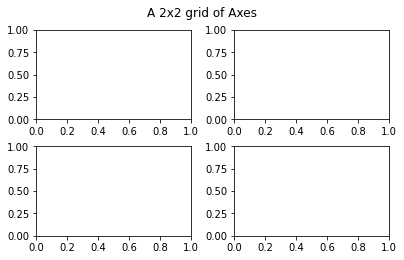

In [13]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(gs[0, 0])

ax1 = fig.add_subplot(gs[0, 1])

ax2 = fig.add_subplot(gs[1, 0])

ax3 = fig.add_subplot(gs[1, 1])

fig.suptitle('A 2x2 grid of Axes')

plt.show()

**First things first: what does <font color='red'>constrained_layout</font> do here?!**

Well, similar to <b>tight_layout</b>, the <b>constrained_layout</b> feature aims at automatically adjusting the subplots and pertinent elements such as legends and colorbars so they fit nicely inside the figure window.

For the case of <i>constrained_layout=True</i>, the layout requested by user is tried to be preserved as much as possible, but please note that compromises may be made automatically when attempting to arrange all the elements of figure in an organized fashion. 

**OK, that's good. But, what about <font color='green'>add_gridspec</font>?!**

Well, by calling the **add_gridspec** method, you can get a ***GridSpec*** object with the specified properties.
For example, here we have a ***GridSpec*** with 2 rows and 2 columns.

In this example, the created ***GridSpec*** object is assigned to the local variable _gs_.

**Sounds good! What about <font color='blue'>add_subplot(gs[...])</font> though?!**

Now, that you have a ***GridSpec*** object with a defined number of columns and rows, you can pass the desired item(s) of the ***GridSpec*** object to the <font color='blue'>add_subplot()</font> method to add a subplot inside the corresponding place(s)! 

For example, _gs[0, 0]_ refers to the item of the first row, and the first column of the GridSpec object.

So, ***GridSpec*** is cool, right?!
We did not plot anything on the generated _Axes_ objects though. 
Let's utilize what we have learnt so far to produce high-quality data visualization for the COVID-19 dataset!

<a id='covid19-data-visualization'></a>
### Data visualization of COVID-19 dataset

In the following, I am defining a function to be called each time we want to add a subplot.
In this way, we don't need to write a large amount of codes over and over for each subplot.

In [14]:
def gen_sub(
    #-----------------
    # positioning
    #-----------------
    fig, gs,
    #-----------------
    # DataFrame config
    #-----------------
    df,
    coly,  
    #-----------------
    # Scale of y
    #-----------------
    scale=1,
    #-----------------
    # main plot config
    #-----------------
    color='red',
    edgecolor='black',
    width=5,
    linewidth=1,
    #-----------------
    # axes config
    #-----------------
    title = None,
    xlabel = None,
    xlabel_fontsize=14,
    ylabel_fontsize=14,
    tick_labelsize=14,
    tile_fontsize=16,
    xticklabels_rotation = 90,
):
    #-------- add subplot ------------------
    ax = fig.add_subplot(gs)
    #-------- main plot --------------------
    ax.bar(df.index, 
        df[coly]*scale,
        color=color,
        edgecolor=edgecolor,
        width=width, 
        linewidth=linewidth
    );
    #-------- configuring axes -------------
    ax.set_xlabel(xlabel, fontsize=xlabel_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_labelsize)
    ax.yaxis.offsetText.set_fontsize(ylabel_fontsize)
    ax.set_title(title, fontsize=tile_fontsize, loc='center')
    plt.setp(ax.get_xticklabels(), rotation=xticklabels_rotation)
    #-------- processing dates -------------
    months = mdates.MonthLocator(bymonth=range(1, 13, 2), bymonthday=-1, interval=1,)
    months_fmt = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)

Now, we can call the function defined above to produce our subplots one at a time, across the grid specified by a 2x2 ***GridSpec*** that is assigned to the local variable _gs_.

We assign one of the subplots to span two columns (full-width) by referencing the corresponding places from the ***GridSpec*** using \[1,:\] as shown in the following:

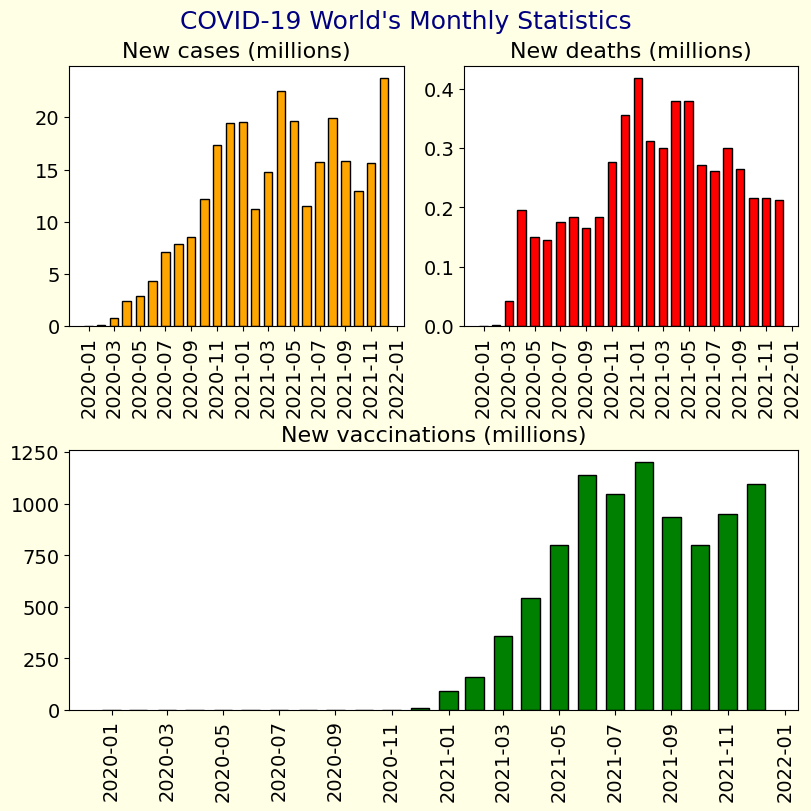

In [15]:
#---------------------------------------
#Python plot grid
#---------------------------------------
fig = plt.figure(figsize=(8, 8), dpi=100, facecolor=(1, 1, 0.9), constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=2)

#-------- gs[0, 0] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,0],
    df=df_world_m_sum,
    scale = 1e-6,
    coly='new_cases', 
    color='orange',
    edgecolor='black',
    width=20,
    title='New cases (millions)')

#-------- gs[0, 1] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,1],
    df=df_world_m_sum,
    scale=1e-6,
    coly='new_deaths', 
    color='red',
    edgecolor='black',
    width=20,
    title='New deaths (millions)')

#-------- gs[1, 0] ---------------------
gen_sub(fig=fig,
    gs=gs[1,:],
    df=df_world_m_sum, 
    scale=1e-6,
    coly='new_vaccinations', 
    color='green',
    edgecolor='black',
    width=20,
    title='New vaccinations (millions)')

fig.suptitle("COVID-19 World's Monthly Statistics", color='navy', fontsize=18)
plt.savefig('./fig/covid-monthly-stats.png');

Now, let's produce the data visualization for the COVID-19 weekly statistics:

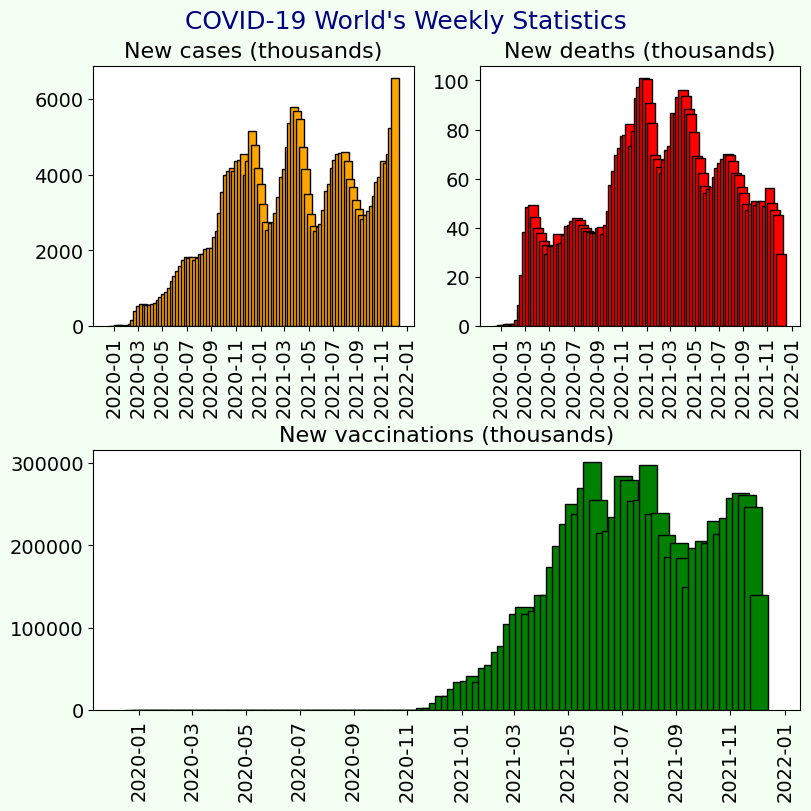

In [16]:
#---------------------------------------
#Python plot grid
#---------------------------------------

fig = plt.figure(figsize=(8, 8), dpi=100, facecolor=(0.95, 1, 0.95), constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=2)

#-------- gs[0, 0] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,0],
    df=df_world_w_sum,
    scale = 1e-3,
    coly='new_cases', 
    color='orange',
    edgecolor='black',
    width=20,
    title='New cases (thousands)')

#-------- gs[0, 1] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,1],
    df=df_world_w_sum,
    scale=1e-3,
    coly='new_deaths', 
    color='red',
    edgecolor='black',
    width=25,
    title='New deaths (thousands)')

#-------- gs[1, 0] ---------------------
gen_sub(fig=fig,
    gs=gs[1,:],
    df=df_world_w_sum, 
    scale=1e-3,
    coly='new_vaccinations', 
    color='green',
    edgecolor='black',
    width=20,
    title='New vaccinations (thousands)')

fig.suptitle("COVID-19 World's Weekly Statistics", color='navy', fontsize=18)
plt.savefig('./fig/covid-weekly-stats.png');

Now, let's change the layout of our figure and plot the COVID-19 weekly statistics:

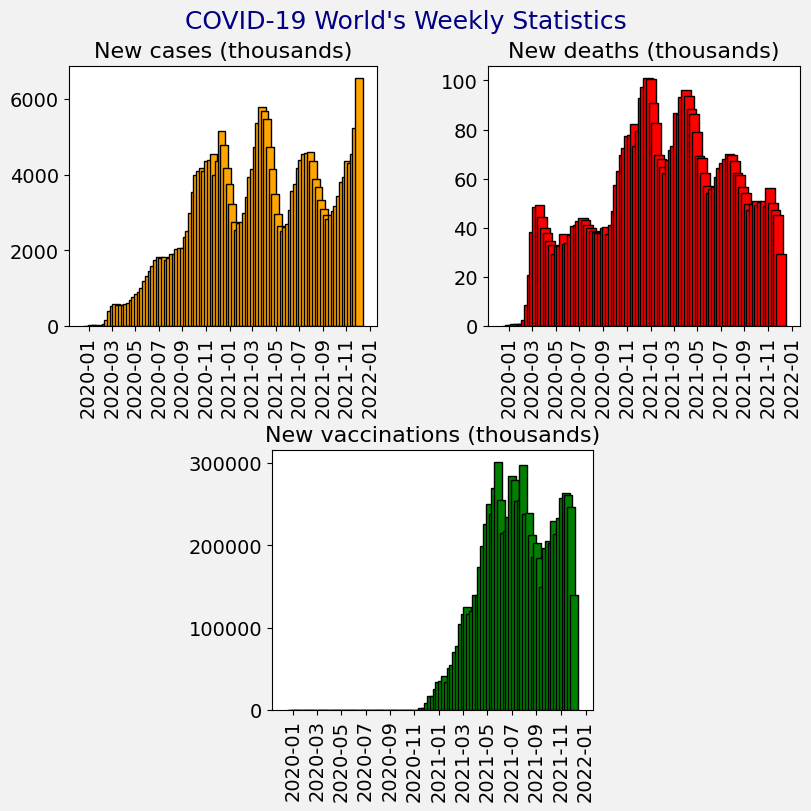

In [17]:
#---------------------------------------
#Python plot grid
#---------------------------------------

fig = plt.figure(figsize=(8, 8), dpi=100, facecolor=(0.95, 0.95, 0.95), constrained_layout=True)
gs = fig.add_gridspec(ncols=4, nrows=2)

#-------- gs[0, 0] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,:2],
    df=df_world_w_sum,
    scale = 1e-3,
    coly='new_cases', 
    color='orange',
    edgecolor='black',
    width=20,
    title='New cases (thousands)')

#-------- gs[0, 1] ---------------------
gen_sub(
    fig=fig,
    gs=gs[0,2:],
    df=df_world_w_sum,
    scale=1e-3,
    coly='new_deaths', 
    color='red',
    edgecolor='black',
    width=25,
    title='New deaths (thousands)')

#-------- gs[1, 0] ---------------------
gen_sub(fig=fig,
    gs=gs[1,1:3],
    df=df_world_w_sum, 
    scale=1e-3,
    coly='new_vaccinations', 
    color='green',
    edgecolor='black',
    width=20,
    title='New vaccinations (thousands)')

fig.suptitle("COVID-19 World's Weekly Statistics", color='navy', fontsize=18)
plt.savefig('./fig/covid-weekly-stats-02.png');

<a id='recap'></a>
## Recap

\- In Matplotlib, the classes ***GridSpec*** and ***SubplotSpec*** form the underlying mechanics of producing subplots.

\- You can create a ***GridSpec*** object with a specified number of columns and rows.

\- You can create subplots in one square of the grid, or subplots spanning multiple rows or columns, by referencing the corresponding items of the ***GridSpec*** object.

\- You can set the <b>constrained_layout</b> keyword as True, _i.e._ <i>constrained_layout=True</i>, to allow the Matplotlib to attempt arranging all the subplots in an organized fashion, while preserving your required layout as much as possible.

<a id='quiz'></a>
## Quiz
Finally, I end this tutorial with a simple quiz!

Try to extend the monthly-report example by adding two more rows to the layout (grid with 4 rows and 2 columns).
Add the corresponding plots for your country in rows 3 and 4.

## Final remarks

In this tutorial, we introduced the ***GridSpec*** and ***SubplotSpec*** classes, and the underlying mechanics of their operation when working with the Matplotlib grid of axes.

We used a COVID-19 dataset in this practical hands-on tutorial. 
We produced the weekly- and monthly-grouped statistical reports for the COVID-19 DataFrame.
Then, we created a ***GridSpec*** object with multiple rows and columns that were assigned later with different subplots.
We also demonstrated how to create subplots that span multiple rows or columns.


Hopefully, this tutorial was able to help you with some of the basics of data science and data visualization. 
Please do not hesitate to let us know if you have any questions or comments by leaving a note below, or [contacting us](https://soardeepsci.com/contact/).
Also, please feel free to check out the rest of the articles on [SoarDeepSci](https://soardeepsci.com/blog/).